In [45]:
from sympy import *
import numpy as np

In [23]:
m, u = symbols("m u", positive = True)
v = Function("v")(m)

display(m, u, v)

m

u

v(m)

In [24]:
ode = Eq(m * diff(v, m), -u)
ode

Eq(m*Derivative(v(m), m), -u)

In [25]:
sol = dsolve(ode, v)
sol

Eq(v(m), C1 - u*log(m))

In [30]:
m0, m1 = symbols("m0 m1", positive = True)
display(m0, m1)

m0

m1

In [31]:
eq = sol.subs({v: 0, m: m0})
eq

Eq(0, C1 - u*log(m0))

In [33]:
C1 = symbols("C1")
c = solve(eq, C1)[0]
c

u*log(m0)

In [34]:
sol_init = sol.rhs.subs(C1, c)
sol_init

-u*log(m) + u*log(m0)

In [35]:
v1 = sol_init.subs(m, m1)
v1

u*log(m0) - u*log(m1)

In [36]:
v1.subs({u: 2, m0: 12.5, m1: 4}).evalf()

2.27886856637673

In [37]:
eps = symbols("epsilon")
eps

epsilon

In [39]:
v1_eps = v1.subs({m1: m0 * eps}).simplify()
v1_eps

-u*log(epsilon)

In [40]:
v1_eps.subs({u: 3, eps: 0.2}).evalf()

4.82831373730230

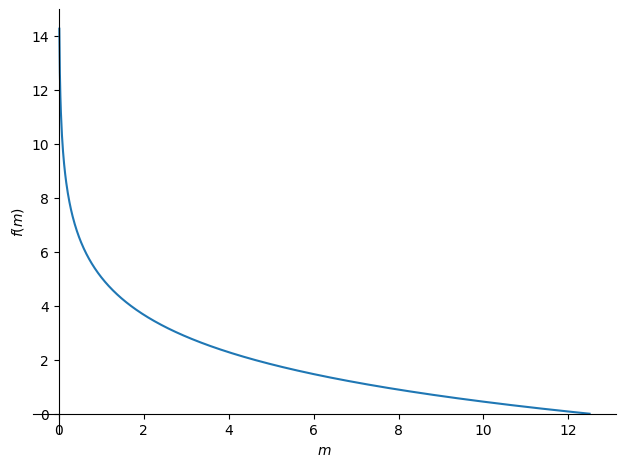

In [47]:
p = plot(sol_init.subs({u: 2, m0: 12.5}), (m, 0.01, 12.5), show = False)
p.show()

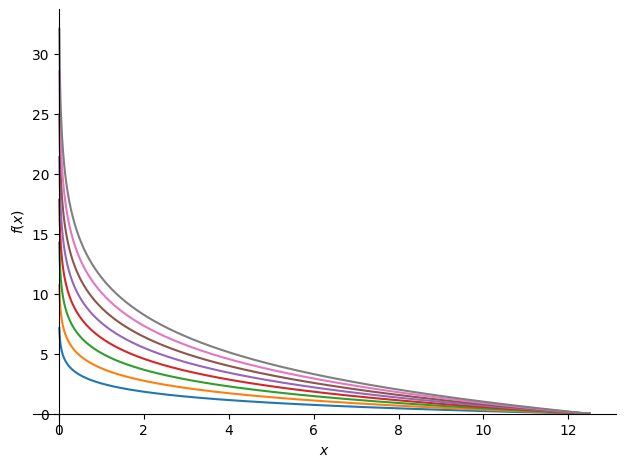

In [46]:
p = plot(show = False)
for u_ in np.arange(1, 5, 0.5):
  p_ = plot(sol_init.subs({u: u_, m0: 12.5}), (m, 0.01, 12.5), show = False)
  p.extend(p_)
p.show()

#Задачи:

1. Исследовать зависимость скорости от числа ступеней (без полезной нагрузки)
2. Исследовать зависимость скорости от числа ступеней с учетом полезной нагрузки
3. Найти наиболее оптимальное разделение на две ступени (без нагрузки)
4. Найти наиболее оптимальное разделение на две ступени (с нагрузкой)
5. Найти наиболее оптимальное разделение на три ступени при заданной доле первой (второй, третьей) ступени (без нагрузки)
6. Найти наиболее оптимальное разделение на три ступени при заданной доле первой (второй, третьей) ступени (с нагрузкой)
7. При заданном режиме $m(t)$ найти высоту, на которой включатся двигатели
8. При заданном режиме $m(t)$ найти зависимость ускорения от времени
9. Найти режим $m(t)$, при котором ускорение будет постоянным
10. Найти значение $\varepsilon$, при котором конечная скорость будет равна скорости света